# Lecture 9: Notes
Prof. Flip Tanedo
2 May 2017

## Newman Ex. 8.3
See page 339 of Newman, *Computational Physics*

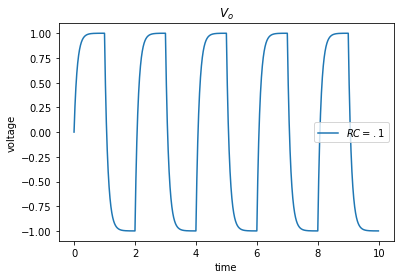

In [1]:
## Import

import numpy as np
import matplotlib.pyplot as plt
from math import floor as floor

## the problem
def f(vin, vout, rc, t):
    return (vin-vout)/rc

## note: identify which variable is "x" and which is "t"
## others are important additional information

def Vin(t):
    floor_t = floor(t)
    if floor_t%2 == 0:
        return 1
    else:
        return -1
    
## Test this function first!

## Set up the run:
dt = 0.01
v0 = 0.0

tpoints = np.arange(0,10,dt)
vpoints = []
rc = 0.1
v=v0

for t in tpoints:
    vpoints.append(v)
    k1 = dt*f(Vin(t), v, rc, t)
    k2 = dt*f(Vin(t), v + 0.5*k1, rc, t + 0.5*t)
    v += k2
    
tt = np.array(tpoints)
vv = np.array(vpoints)

plt.plot(tt, vv, label='$RC=.1$')
plt.title("$V_o$")
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend()
plt.show()

In [4]:
## Let's automate this

def time_and_voltages(dt,rc):
    v = 0.0
    tpoints = np.arange(0,10,dt)
    vpoints = []
    
    for t in tpoints:
        vpoints.append(v)
        k1 = dt*f(Vin(t), v, rc, t)
        k2 = dt*f(Vin(t), v + 0.5*k1, rc, t + 0.5*t)
        v += k2

    tt = np.array(tpoints)
    vv = np.array(vpoints)

    return tt, vv


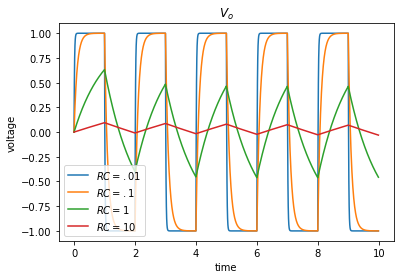

In [14]:
ttt = []
vvv = []

for RC in [0.01, 0.1, 1, 10]:
    tt, vv = time_and_voltages(.01, RC)
    ttt.append(tt)
    vvv.append(vv)

plt.plot(ttt[0], vvv[0], label='$RC=.01$')
plt.plot(ttt[1], vvv[1], label='$RC=.1$')
plt.plot(ttt[2], vvv[2], label='$RC=1$')
plt.plot(ttt[3], vvv[3], label='$RC=10$')
plt.title("$V_o$")
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend()
plt.show()

Discussion: this is a low-pass filter. 

## What could go wrong?

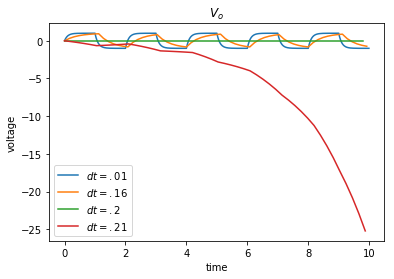

In [23]:
ttt = []
vvv = []

RC = 0.1

for dt in [0.01, 0.16, .2, .21]:
    tt, vv = time_and_voltages(dt, RC)
    ttt.append(tt)
    vvv.append(vv)

plt.plot(ttt[0], vvv[0], label='$dt=.01$')
plt.plot(ttt[1], vvv[1], label='$dt=.16$')
plt.plot(ttt[2], vvv[2], label='$dt=.2$')
plt.plot(ttt[3], vvv[3], label='$dt=.21$')
plt.title("$V_o$")
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend()
plt.show()